# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

#weather_api_key = "4b56d7089e66317e8b7d467d214f373b"

print(weather_api_key)


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(citipy)

4b56d7089e66317e8b7d467d214f373b
<module 'citipy.citipy' from '/Users/prabhakaranmathivanan/anaconda3/lib/python3.11/site-packages/citipy/citipy.py'>


### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1],).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 616


In [22]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&lang=en"   
city_weather = requests.get(city_url).json()
format_city_weather = json.dumps(city_weather, indent = 2)
print(format_city_weather)

{
  "coord": {
    "lon": 82.1838,
    "lat": 29.2747
  },
  "weather": [
    {
      "id": 800,
      "main": "Clear",
      "description": "clear sky",
      "icon": "01d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 272.15,
    "feels_like": 269.06,
    "temp_min": 272.15,
    "temp_max": 272.15,
    "pressure": 1022,
    "humidity": 50,
    "sea_level": 1022,
    "grnd_level": 768
  },
  "visibility": 10000,
  "wind": {
    "speed": 2.39,
    "deg": 118,
    "gust": 3.38
  },
  "clouds": {
    "all": 0
  },
  "dt": 1708739318,
  "sys": {
    "country": "NP",
    "sunrise": 1708736581,
    "sunset": 1708777593
  },
  "timezone": 20700,
  "id": 1283285,
  "name": "Jumla",
  "cod": 200
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
#city_url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}"   

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}    
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&lang=en"                   
   
    # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        if i==0:
            pprint.pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']
        City = city_weather['main']['temp_max']
        City = city_weather['name']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 2 of Set 1 | rio grande
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | jalalaqsi
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kill devil hills
Processing Record 9 of Set 1 | qarah zia' od din
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | remire-montjoly
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | stephenville
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | talara
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | ancud
Proces

Processing Record 36 of Set 4 | klyuchi
Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | mirnyy
Processing Record 39 of Set 4 | sao jose de ribamar
Processing Record 40 of Set 4 | al jahra'
Processing Record 41 of Set 4 | bijapur
Processing Record 42 of Set 4 | calvi
Processing Record 43 of Set 4 | bamboo flat
Processing Record 44 of Set 4 | wailua homesteads
Processing Record 45 of Set 4 | grand falls-windsor
Processing Record 46 of Set 4 | bealanana
Processing Record 47 of Set 4 | badger
Processing Record 48 of Set 4 | soio
Processing Record 49 of Set 4 | alto araguaia
Processing Record 0 of Set 5 | enewetak
Processing Record 1 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 2 of Set 5 | baiona
Processing Record 3 of Set 5 | tara
Processing Record 4 of Set 5 | merizo village
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | alotau
City not found. Skipping...
Processing Record 7 of Set 5 | egilsstadir
Process

Processing Record 25 of Set 8 | dera bugti
Processing Record 26 of Set 8 | adrar
Processing Record 27 of Set 8 | san lawrenz
Processing Record 28 of Set 8 | tindouf
Processing Record 29 of Set 8 | acapulco de juarez
Processing Record 30 of Set 8 | wuyang
Processing Record 31 of Set 8 | coahuayana de hidalgo
Processing Record 32 of Set 8 | ambalangoda
Processing Record 33 of Set 8 | kuressaare
Processing Record 34 of Set 8 | hoxtolgay
City not found. Skipping...
Processing Record 35 of Set 8 | tomatlan
Processing Record 36 of Set 8 | mersing
Processing Record 37 of Set 8 | dom pedrito
Processing Record 38 of Set 8 | matelandia
Processing Record 39 of Set 8 | mohr
Processing Record 40 of Set 8 | euclides da cunha
Processing Record 41 of Set 8 | fiambala
Processing Record 42 of Set 8 | pereslavl'-zalesskiy
Processing Record 43 of Set 8 | ciudad acuna
Processing Record 44 of Set 8 | toliara
Processing Record 45 of Set 8 | nuuk
Processing Record 46 of Set 8 | salumbar
Processing Record 47 o

City not found. Skipping...
Processing Record 15 of Set 12 | miri
Processing Record 16 of Set 12 | freeport
Processing Record 17 of Set 12 | undurkhaan
Processing Record 18 of Set 12 | aswan
Processing Record 19 of Set 12 | warrenton
Processing Record 20 of Set 12 | golfito
Processing Record 21 of Set 12 | kerikeri
Processing Record 22 of Set 12 | porto murtinho
Processing Record 23 of Set 12 | tofol
Processing Record 24 of Set 12 | coyhaique
Processing Record 25 of Set 12 | zhaobaoshan
Processing Record 26 of Set 12 | popondetta
Processing Record 27 of Set 12 | takoradi
Processing Record 28 of Set 12 | gagliano del capo
Processing Record 29 of Set 12 | anapolis
Processing Record 30 of Set 12 | gaspe
Processing Record 31 of Set 12 | kodinsk
Processing Record 32 of Set 12 | noyabrsk
Processing Record 33 of Set 12 | ocean city
Processing Record 34 of Set 12 | gustavsberg
Processing Record 35 of Set 12 | mollerussa
Processing Record 36 of Set 12 | kalabo
Processing Record 37 of Set 12 | a

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rio grande,-32.0350,-52.0986,298.12,89,68,1.90,BR,1708679562
1,bredasdorp,-34.5322,20.0403,289.77,82,10,2.82,ZA,1708748534
2,jalalaqsi,3.3766,45.5996,297.63,66,26,7.50,SO,1708744203
3,la passe,45.5549,-0.8967,278.28,77,71,5.44,FR,1708757532
4,alice springs,-23.7000,133.8833,307.71,22,0,5.14,AU,1708721815


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio grande,-32.0350,-52.0986,298.12,89,68,1.90,BR,1708679562
1,bredasdorp,-34.5322,20.0403,289.77,82,10,2.82,ZA,1708748534
2,jalalaqsi,3.3766,45.5996,297.63,66,26,7.50,SO,1708744203
3,la passe,45.5549,-0.8967,278.28,77,71,5.44,FR,1708757532
4,alice springs,-23.7000,133.8833,307.71,22,0,5.14,AU,1708721815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

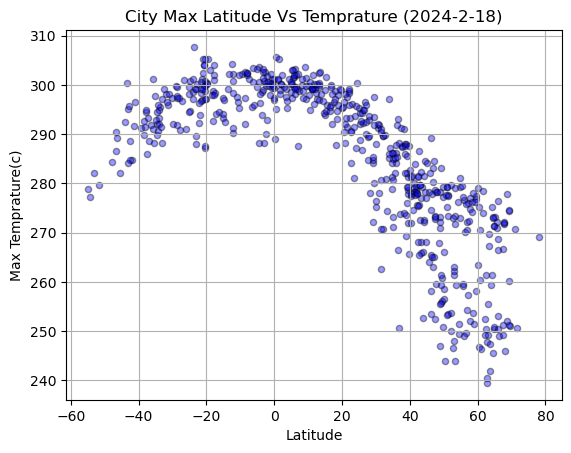

In [31]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
ax1 = city_data_df.plot.scatter(x='Lat',y='Max Temp',c='blue',alpha=0.4, edgecolors='black')




# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude Vs Temprature (2024-2-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(c)")
ax1.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

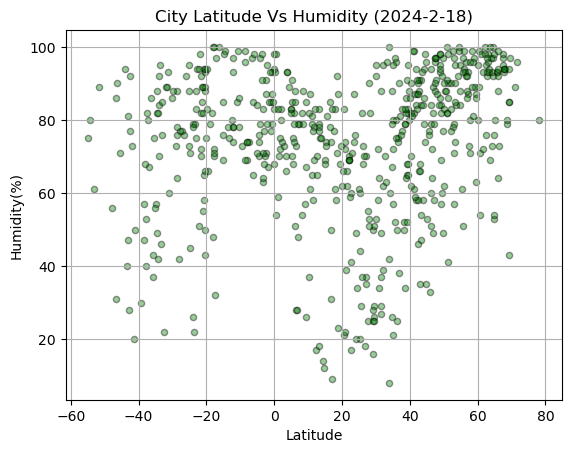

In [32]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

ax2 = city_data_df.plot.scatter(x='Lat',y='Humidity',c='green',alpha=0.4, edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE



plt.title("City Latitude Vs Humidity (2024-2-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
ax2.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

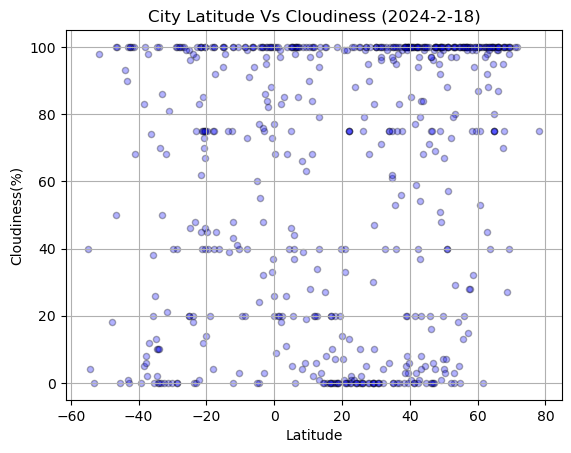

In [33]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
ax3 = city_data_df.plot.scatter(x='Lat',y='Cloudiness',c='blue',alpha=0.3, edgecolors='black')
# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude Vs Cloudiness (2024-2-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
ax3.grid(True)





# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

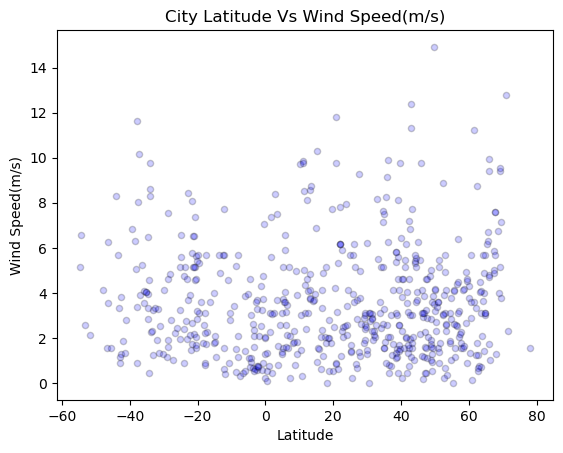

In [34]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
ax4 = city_data_df.plot.scatter(x='Lat',y='Wind Speed',c='blue',alpha=0.2, edgecolors='black')


# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Latitude Vs Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
ax3.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linregres(x ,y):    
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regress_values = x * slope + intercept 
    line_eq = "y =" +str(round(slope,2)) + "x + " +str(round(intercept,2))
    print(regress_values)
    print(rvalue)
    print(line_eq)
    return rvalue ,regress_values ,line_eq











In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

#df.loc[df['shield'] > 6]



# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jalalaqsi,3.3766,45.5996,297.63,66,26,7.50,SO,1708744203
3,la passe,45.5549,-0.8967,278.28,77,71,5.44,FR,1708757532
6,kill devil hills,36.0307,-75.6760,284.15,96,40,2.57,US,1708688487
7,qarah zia' od din,38.8915,45.0255,273.63,86,100,1.50,IR,1708746047
8,hamilton,39.1834,-84.5333,282.12,65,20,4.63,US,1708690813


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rio grande,-32.0350,-52.0986,298.12,89,68,1.90,BR,1708679562
1,bredasdorp,-34.5322,20.0403,289.77,82,10,2.82,ZA,1708748534
4,alice springs,-23.7000,133.8833,307.71,22,0,5.14,AU,1708721815
5,adamstown,-25.0660,-130.1015,299.60,73,20,3.26,PN,1708698691
10,invercargill,-46.4000,168.3500,289.27,90,100,6.26,NZ,1708711992


###  Temperature vs. Latitude Linear Regression Plot

City_ID
2      303.706230
3      274.130241
6      280.808738
7      278.802706
8      278.598022
          ...    
581    278.624949
582    273.715193
583    262.096577
584    291.944497
586    270.505599
Name: Lat, Length: 410, dtype: float64
-0.8351770952685248
y =-0.7x + 306.07


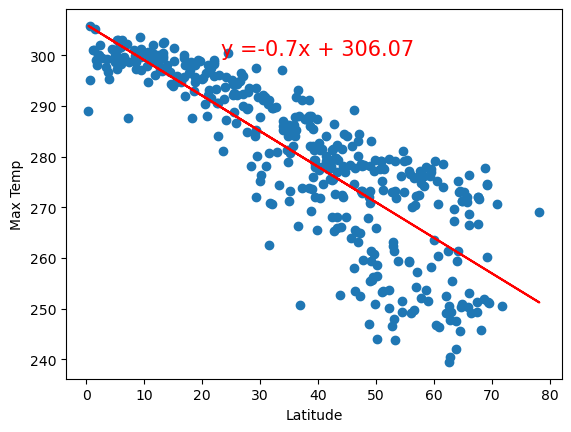

The r-value is:-0.8351770952685248


In [38]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

temp = northern_hemi_df["Max Temp"]
Lat  = northern_hemi_df["Lat"]

r_northern,regres_values,line = linregres(Lat,temp)


plt.scatter(Lat,temp)
plt.plot(Lat,regres_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.plot()
plt.annotate(line,(40,300),fontsize=15,color="red",ha= 'center')
plt.show()


print(f"The r-value is:{r_northern}")





City_ID
0      293.744731
1      293.146517
4      295.741412
5      295.414182
10     290.303539
          ...    
570    296.403228
572    300.237048
574    300.622466
580    296.096743
585    295.172951
Name: Lat, Length: 177, dtype: float64
0.5953838653473962
y =0.24x + 301.42


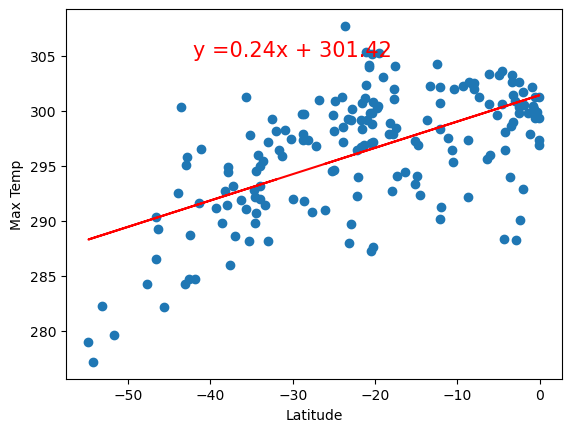

The r-value is:0.5953838653473962


In [39]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

temp_south = southern_hemi_df["Max Temp"]
Lat_south  = southern_hemi_df["Lat"]

r_southern,regres_values_south,line_south = linregres(Lat_south,temp_south)


plt.scatter(Lat_south,temp_south)
plt.plot(Lat_south,regres_values_south,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
y_shift = 5
width = 1
x_shift = width/2.0
plt.plot()
plt.annotate(line_south,(-30,305),fontsize=15,color="red",ha= 'center')
plt.show()

print(f"The r-value is:{r_southern}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

City_ID
2      59.326839
3      76.561274
6      72.669600
7      73.838549
8      73.957822
         ...    
581    73.942131
582    76.803130
583    83.573496
584    66.180602
586    78.673416
Name: Lat, Length: 410, dtype: float64
0.3647002830424722
y =0.41x + 57.95


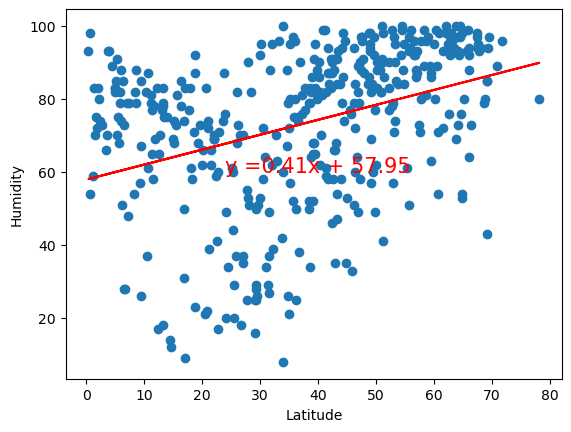

The r-value is:0.3647002830424722


In [40]:
# Northern Hemisphere
# YOUR CODE HERE

Humidity_nrth = northern_hemi_df["Humidity"]
Lat_north  = northern_hemi_df["Lat"]

r_northern_hum,regres_values_hum,line_north = linregres(Lat_north,Humidity_nrth)


plt.scatter(Lat_north,Humidity_nrth)
plt.plot(Lat_north,regres_values_hum,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.plot()
plt.annotate(line_north,(40,60),fontsize=15,color="red",ha= 'center')
plt.show()


print(f"The r-value is:{r_northern_hum}")




City_ID
0      70.612143
1      69.545995
4      74.170667
5      73.587470
10     64.479188
         ...    
570    75.350166
572    82.182873
574    82.869772
580    74.803943
585    73.157544
Name: Lat, Length: 177, dtype: float64
0.3281679402560572
y =0.43x + 84.29


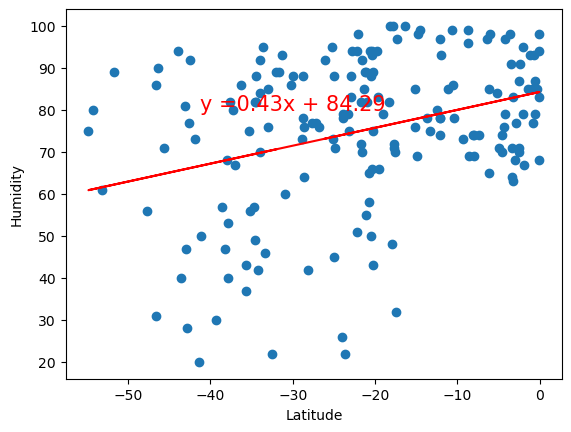

The r-value is:0.3281679402560572


In [41]:
# Southern Hemisphere
# YOUR CODE HERE

Humidity_south = southern_hemi_df["Humidity"]
Lat_south  = southern_hemi_df["Lat"]

r_southern_hum,regres_values_south_hum,line_south_hum = linregres(Lat_south,Humidity_south)


plt.scatter(Lat_south,Humidity_south)
plt.plot(Lat_south,regres_values_south_hum,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot()
plt.annotate(line_south_hum,(-30,80),fontsize=15,color="red",ha= 'center')
plt.show()

print(f"The r-value is:{r_southern_hum}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
2      41.418849
3      67.826658
6      61.863562
7      63.654707
8      63.837466
         ...    
581    63.813424
582    68.197246
583    78.571276
584    51.920665
586    71.063029
Name: Lat, Length: 410, dtype: float64
0.29111239463554095
y =0.63x + 39.3


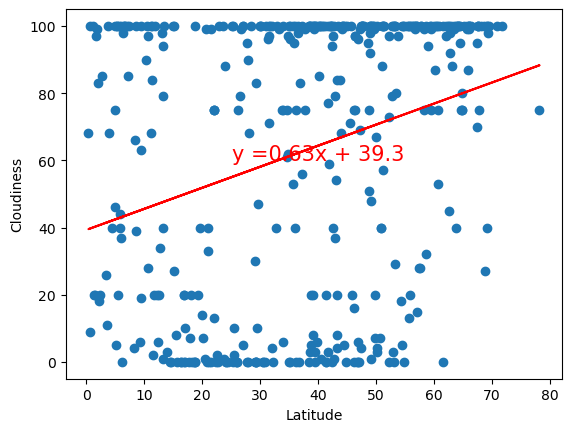

The r-value is:0.29111239463554095


In [42]:
# Northern Hemisphere

Cloudiness_nrth = northern_hemi_df["Cloudiness"]
Lat_north  = northern_hemi_df["Lat"]

r_northern_cloud,regres_values_cloud,line_north_cloud = linregres(Lat_north,Cloudiness_nrth)


plt.scatter(Lat_north,Cloudiness_nrth)
plt.plot(Lat_north,regres_values_cloud,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.plot()
plt.annotate(line_north_cloud,(40,60),fontsize=15,color="red",ha= 'center')
plt.show()


print(f"The r-value is:{r_northern_cloud}")
# YOUR CODE HERE

City_ID
0      52.827681
1      51.193761
4      58.281277
5      57.387503
10     43.428652
         ...    
570    60.088914
572    70.560342
574    71.613047
580    59.251802
585    56.728622
Name: Lat, Length: 177, dtype: float64
0.2417051366103232
y =0.65x + 73.79


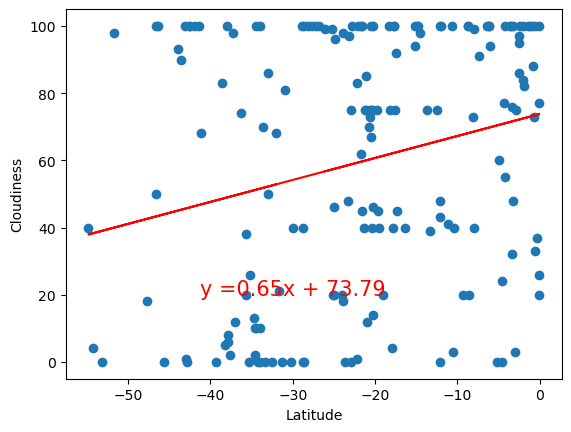

The r-value is:0.2417051366103232


In [43]:
# Southern Hemisphere
# YOUR CODE HERE
Cloudiness_south = southern_hemi_df["Cloudiness"]
Lat_south  = southern_hemi_df["Lat"]

r_southern_cloud,regres_values_south_cloud,line_south_cloud = linregres(Lat_south,Cloudiness_south)


plt.scatter(Lat_south,Cloudiness_south)
plt.plot(Lat_south,regres_values_south_cloud,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot()
plt.annotate(line_south_cloud,(-30,20),fontsize=15,color="red",ha= 'center')
plt.show()

print(f"The r-value is:{r_southern_cloud}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
2      3.335639
3      3.630480
6      3.563902
7      3.583900
8      3.585941
         ...   
581    3.585672
582    3.634617
583    3.750442
584    3.452891
586    3.666613
Name: Lat, Length: 410, dtype: float64
0.05298243678563856
y =0.01x + 3.31


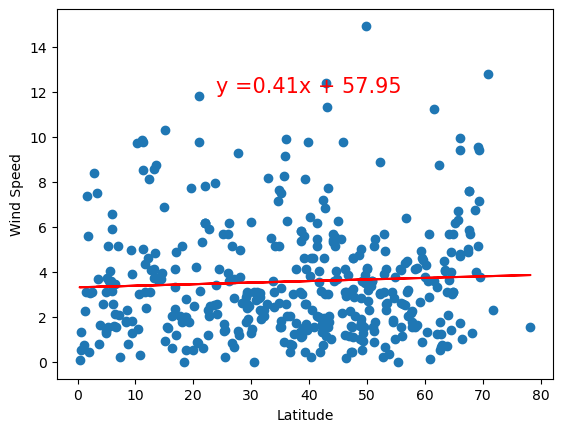

The r-value is:0.05298243678563856


In [44]:
# Northern Hemisphere
WS_nrth = northern_hemi_df["Wind Speed"]
Lat_north  = northern_hemi_df["Lat"]

r_northern_ws,regres_values_ws,line_north_ws = linregres(Lat_north,WS_nrth)


plt.scatter(Lat_north,WS_nrth)
plt.plot(Lat_north,regres_values_ws,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.plot()
plt.annotate(line_north,(40,12),fontsize=15,color="red",ha= 'center')
plt.show()


print(f"The r-value is:{r_northern_ws}")
# YOUR CODE HERE

City_ID
0      3.870296
1      3.990053
4      3.470578
5      3.536086
10     4.559193
         ...   
570    3.338088
572    2.570590
574    2.493433
580    3.399444
585    3.584379
Name: Lat, Length: 177, dtype: float64
-0.298559631850683
y =-0.05x + 2.33


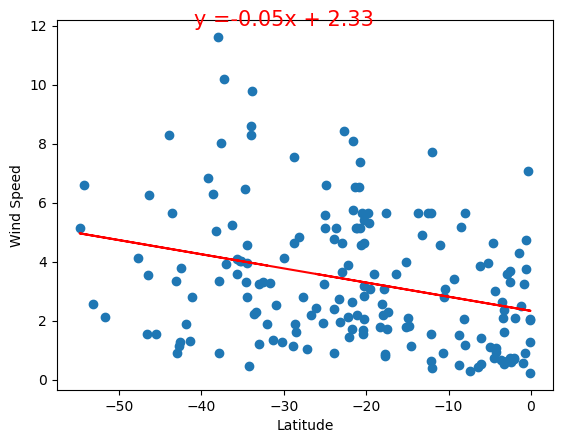

The r-value is:-0.298559631850683


In [45]:
# Southern Hemisphere
# YOUR CODE HERE
ws_south = southern_hemi_df["Wind Speed"]
Lat_south  = southern_hemi_df["Lat"]

r_southern_ws,regres_values_south_ws,line_south_ws = linregres(Lat_south,ws_south)


plt.scatter(Lat_south,ws_south)
plt.plot(Lat_south,regres_values_south_ws,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot()
plt.annotate(line_south_ws,(-30,12),fontsize=15,color="red",ha= 'center')
plt.show()

print(f"The r-value is:{r_southern_ws}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE